# Best offer

Описание датасета
В данных представлены строки с предложениями продавцов (офферами) по конкретным товарам (одна строка - один оффер). Несколько строк, сгруппированных по товару (item_id) и времени (period), составляют витрину. Продавец, находящийся на первой строке витрины (order = 0) называется победителем (bbwin), остальные считаются проигравшими.

In [1708]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings("ignore")

In [1709]:
# Load dataset
offer = pd.read_csv('offers.tsv', sep="\t")

offer.head(5)

,offerId,offerType,availabilityStatus,fulfillmentType,fulfillmentBadge,sellerId,catalogSellerId,sellerName,sellerDisplayName,sellerType,...,maxDeliveryDate,ship_price,unit_price,returnWindow_value,returnWindow_unitType,period,item_id,store,order,reason
0,6345FF23CE7B432BB686569D63EC735A,ONLINE_ONLY,AVAILABLE,FC,2 Days,C10871421F0445B0B8BE17C6FBB1E6F0,2810,Adina's Health & Beauty LLC,Adina's Beauty Shop,EXTERNAL,...,NaN,NaN,0.0,90,Day,2023-01-26 15:43:17,714678523,3520,0,notification
1,5FB3F5CAE717475598475BCEC095B51B,ONLINE_ONLY,AVAILABLE,FC,2 Days,81DE41429FF94E739203C7941E9EC043,101003670,Ronells LLC,thanks2you,EXTERNAL,...,NaN,NaN,0.0,90,Day,2023-01-26 15:43:17,714678523,3520,1,notification
2,4028FAF371BD4A29952EF25BDB753BE9,ONLINE_ONLY,AVAILABLE,MARKETPLACE,NaN,7A5A3C87076041B3B4D239962E5EED09,1294,Beauty It Is,Fit & Fab,EXTERNAL,...,NaN,0.0,0.0,30,Day,2023-01-26 15:43:17,714678523,3520,2,notification
3,6345FF23CE7B432BB686569D63EC735A,ONLINE_ONLY,AVAILABLE,FC,2 Days,C10871421F0445B0B8BE17C6FBB1E6F0,2810,Adina's Health & Beauty LLC,Adina's Beauty Shop,EXTERNAL,...,NaN,NaN,0.0,90,Day,2023-01-26 15:48:22,714678523,3520,0,notification
4,5FB3F5CAE717475598475BCEC095B51B,ONLINE_ONLY,AVAILABLE,FC,2 Days,81DE41429FF94E739203C7941E9EC043,101003670,Ronells LLC,thanks2you,EXTERNAL,...,NaN,NaN,0.0,90,Day,2023-01-26 15:48:22,714678523,3520,1,notification


In [1711]:
# посмотрим столбцы на %-т пропущенных данных
offer.isna().sum() / offer.shape[0] * 100
# maxDeliveryDate можно удалять все данные NA

offerId                    0.000000
offerType                  0.000000
availabilityStatus         0.000000
fulfillmentType            0.000000
fulfillmentBadge          17.983925
sellerId                   0.000000
catalogSellerId            0.000000
sellerName                 0.000000
sellerDisplayName          0.000000
sellerType                 0.000000
wfsEnabled                 0.000000
hasSellerBadge             5.793704
returnable                 0.000000
freeReturns                0.000000
price                      0.000000
slaTier                    0.000000
deliveryDate               0.000000
maxDeliveryDate          100.000000
ship_price                11.788346
unit_price                17.615539
returnWindow_value         0.000000
returnWindow_unitType      0.000000
period                     0.000000
item_id                    0.000000
store                      0.000000
order                      0.000000
reason                     0.000000
dtype: float64

In [1712]:
offer.describe()

,catalogSellerId,price,maxDeliveryDate,ship_price,unit_price,returnWindow_value,item_id,store,order
count,5.972000e+03,5972.000000,0.0,5268.000000,4920.000000,5972.000000,5.972000e+03,5972.0,5972.000000
mean,3.878383e+07,20.821788,NaN,0.003411,2.348862,82.685867,5.597767e+08,3520.0,0.746818
std,4.912641e+07,8.809527,NaN,0.142916,8.541057,19.632014,2.799138e+08,0.0,0.839207
min,0.000000e+00,8.000000,NaN,0.000000,0.000000,30.000000,5.487872e+07,3520.0,0.000000
25%,2.810000e+03,15.900000,NaN,0.000000,0.000000,90.000000,7.146785e+08,3520.0,0.000000
50%,4.623000e+03,15.950000,NaN,0.000000,0.000000,90.000000,7.146785e+08,3520.0,1.000000
75%,1.010037e+08,18.990000,NaN,0.000000,0.000000,90.000000,7.146785e+08,3520.0,1.000000
max,1.012874e+08,51.310000,NaN,5.990000,33.400000,90.000000,9.087694e+08,3520.0,7.000000


In [1713]:
offer.describe(include='object')
# offerType единственный вид ONLINE_ONLY поэтому удаляем
# availabilityStatus единственный вид AVAILABLE поэтому удаляем
# sellerName, sellerId, catalogSellerId удаляем пока оставляем sellerDisplayName
# returnWindow_unitType единственный вид Day поэтому удаляем
# store одна локация
# unit_price указана только у Walmart.com, но повторяет значение price - удаляем

,offerId,offerType,availabilityStatus,fulfillmentType,fulfillmentBadge,sellerId,sellerName,sellerDisplayName,sellerType,hasSellerBadge,slaTier,deliveryDate,returnWindow_unitType,period,reason
count,5972,5972,5972,5972,4898,5972,5972,5972,5972,5626,5972,5972,5972,5972,5972
unique,20,1,1,2,1,15,15,15,2,2,2,13,1,2625,3
top,6345FF23CE7B432BB686569D63EC735A,ONLINE_ONLY,AVAILABLE,FC,2 Days,C10871421F0445B0B8BE17C6FBB1E6F0,Adina's Health & Beauty LLC,Adina's Beauty Shop,EXTERNAL,False,TWO_DAY,2023-01-31,Day,2023-02-03 09:37:10,notification
freq,2276,5972,5972,5244,4898,2622,2622,2622,5626,3343,4898,2824,5972,8,3944


In [1714]:
offer.freeReturns.sum()
# freeReturns одинаковое значения удаляем

5972

In [1715]:
offer.returnable.sum()
# returnable одинаковое значения удаляем

5972

In [2335]:
# очищаем датасет
offer_cl = offer.drop(['maxDeliveryDate', 'offerId', 'offerType', 'availabilityStatus', 'store', 'unit_price', 'returnable',
                       'sellerName', 'sellerId','returnWindow_unitType', 'freeReturns', 'catalogSellerId'], axis=1)

In [2336]:
# сортировка для выделения витрин
offer_cl = offer_cl.sort_values(['item_id', 'period', 'order'])

In [2337]:
offer_cl.head(5)

,fulfillmentType,fulfillmentBadge,sellerDisplayName,sellerType,wfsEnabled,hasSellerBadge,price,slaTier,deliveryDate,ship_price,returnWindow_value,period,item_id,order,reason
2998,MARKETPLACE,NaN,Maison Rouge,EXTERNAL,False,False,29.78,THREE_TO_FIVE_DAY,2023-02-02,0.0,30,2023-01-30 07:23:17,54878715,0,notification
2999,FC,2 Days,Adina's Beauty Shop,EXTERNAL,True,False,37.00,TWO_DAY,2023-02-01,NaN,90,2023-01-30 07:23:17,54878715,1,notification
3000,FC,NaN,Walmart.com,INTERNAL,False,NaN,33.40,THREE_TO_FIVE_DAY,2023-02-02,NaN,90,2023-01-30 07:23:17,54878715,2,notification
3001,MARKETPLACE,NaN,SS-BEAUTY,EXTERNAL,False,False,44.23,THREE_TO_FIVE_DAY,2023-02-06,0.0,30,2023-01-30 07:23:17,54878715,3,notification
3002,MARKETPLACE,NaN,Maison Rouge,EXTERNAL,False,False,29.78,THREE_TO_FIVE_DAY,2023-02-02,0.0,30,2023-01-30 07:23:27,54878715,0,check


In [2338]:
# reason повторяется для всех рангов order удаляем
offer_cl = offer_cl.drop(['reason'], axis=1)

# Сгенерируем признак - вычислим количество дней доставки
offer_cl['deliveryDays'] = (pd.to_datetime(offer_cl.deliveryDate) - pd.to_datetime(offer_cl.period)).dt.days

# после этого можно удалять deliveryDate, которая взаимосвязана с deliveryDays
offer_cl = offer_cl.drop(['deliveryDate'], axis=1)

# fulfillmentBadge заполним NaN - 'unknown'
offer_cl.fulfillmentBadge = offer_cl.fulfillmentBadge.fillna('unknown')

# hasSellerBadge заполним NaN - 'unknown'
offer_cl.hasSellerBadge = offer_cl.hasSellerBadge.fillna('unknown')

In [1758]:
#из 5972 строк 722 имеют ранг больше 2. Ранговые модели будем строить по 2 вариантам:
# 1) по order по всем рангам
# 2) по win 0 релевантное событие, 1 нерелевантное

# Созадим еще 1 целевой столбец победа = 0, остальные ранги 0
offer_cl['win'] = (offer_cl.order >= 1).astype(int)

sum(offer_cl.order > 1)

722

# Посмотрим оставшиеся признаки на графиках

Text(0.5, 1.0, 'Count of fulfillmentType by win')

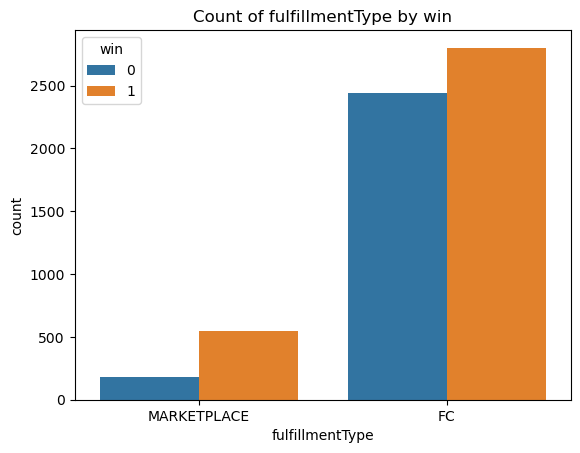

In [2340]:
sns.countplot(data=offer_cl, x="fulfillmentType", hue="win")
plt.title("Count of fulfillmentType by win", size=12)

Продавцы, которое в Marketplace чаще проиграют - оставим feature для модели

Text(0.5, 1.0, 'Count of fulfillmentBadge by win')

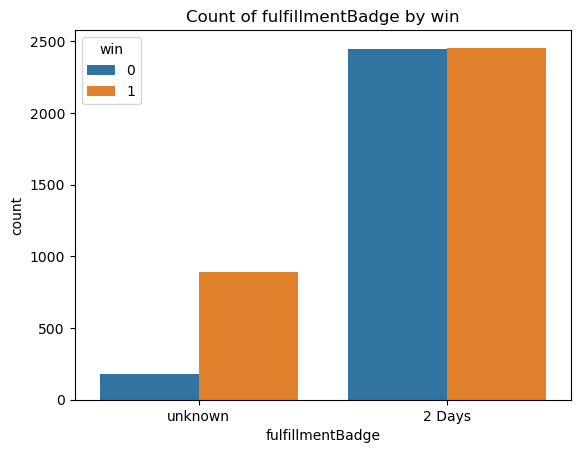

In [1730]:
sns.countplot(data=offer_cl, x="fulfillmentBadge", hue="win")
plt.title("Count of fulfillmentBadge by win", size=12)

Для fulfillmentBadge, которые unknown чаще проигравает - оставим feature для модели

Text(0.5, 1.0, 'Count of sellerDisplayName by win')

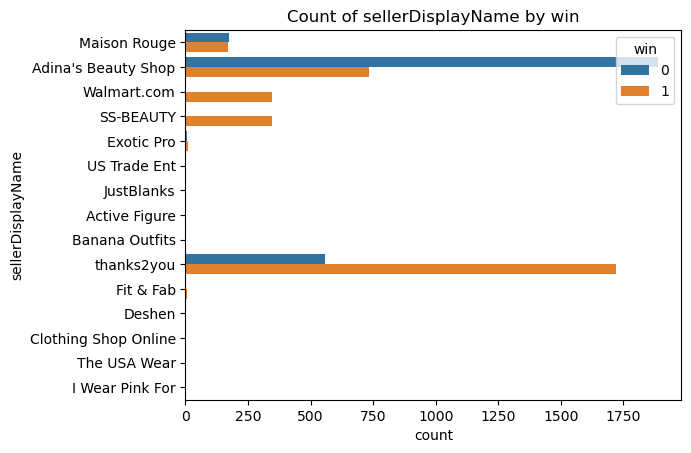

In [1731]:
sns.countplot(data=offer_cl, y="sellerDisplayName", hue="win")
plt.title("Count of sellerDisplayName by win", size=12)

В Датасете есть: Топ 3 магазинов, которые выигрывают чаще всего:
1) Adina's Beauty Shop, 
2) thaks2you (но по многим позициям он проигрывает)
3) Maison Rouge

In [2341]:
# выберем магазин с самым большим ассортиментом и создадим признак
offer_cl['top_seller'] = offer_cl.groupby("sellerDisplayName")['win'].count().sort_values(ascending=False).index[0]
offer_cl['top_sellerMark'] = (offer_cl['top_seller'] == offer_cl["sellerDisplayName"]).astype(int)
offer_cl = offer_cl.drop(['top_seller'], axis=1)

Text(0.5, 1.0, 'Count of sellerType by win')

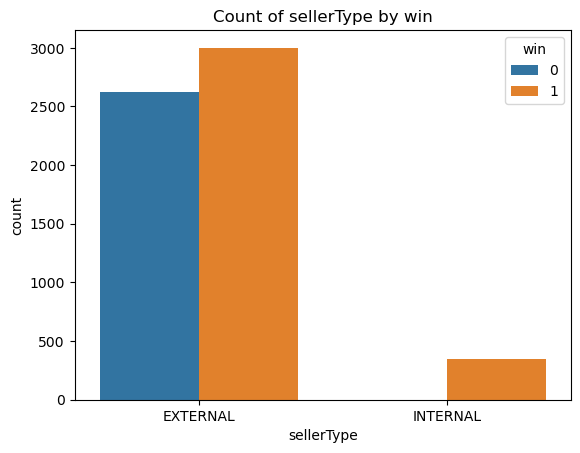

In [1733]:
sns.countplot(data=offer_cl, x="sellerType", hue="win")
plt.title("Count of sellerType by win", size=12)

Для вида Internal (это Wallmart) по размещенным предложениям он проигрывают

Text(0.5, 1.0, 'Count of wfsEnabled by win')

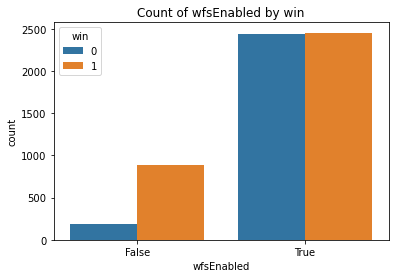

In [200]:
sns.countplot(data=offer_cl, x="wfsEnabled", hue="win")
plt.title("Count of wfsEnabled by win", size=12)

Статус wfsEnabled, когда False чаще проигрывает в витринах - оставим feature для модели

Text(0.5, 1.0, 'Count of hasSellerBadge by win')

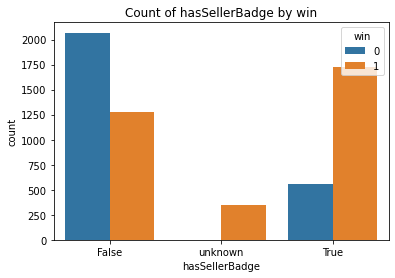

In [201]:
sns.countplot(data=offer_cl, x="hasSellerBadge", hue="win")
plt.title("Count of hasSellerBadge by win", size=12)

Статус hasSellerBadge равный True и unknown чаще проигрывают в витринах - оставим feature для модели

Text(0.5, 1.0, 'Count of slaTier by win')

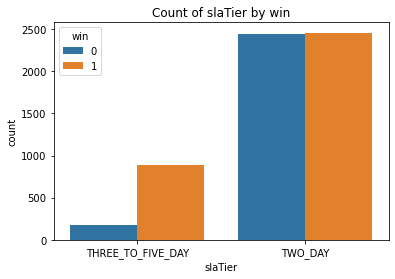

In [202]:
# При сроке достакви THREE_TO_FIVE_DAY чаще проигрывают в витринах (срок доставки влияет на покупку) - остави
# feature для модели
sns.countplot(data=offer_cl, x="slaTier", hue="win")
plt.title("Count of slaTier by win", size=12)

Text(0.5, 1.0, 'Count of deliveryDays by win')

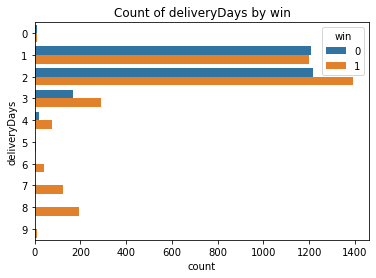

In [203]:
# Если срок доставки был больше 4 дней, всегда был выбор в пользу другого продавца. Самые частый срок доставки 1,2 дня - оставим
# feature для модели
sns.countplot(data=offer_cl, y="deliveryDays", hue="win")
plt.title("Count of deliveryDays by win", size=12)

Text(0.5, 1.0, 'Count of returnWindow_value by win')

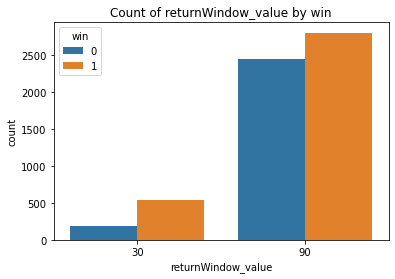

In [204]:
# Побеждает чаще предложение с более длинным сроком возврата - оставим feature для модели
sns.countplot(data=offer_cl, x="returnWindow_value", hue="win")
plt.title("Count of returnWindow_value by win", size=12)

In [2342]:
# создадим признак цена с учетом доставки FullPrice
offer_cl['ship_price'] = offer_cl.ship_price.fillna(0)
offer_cl['FullPrice'] = offer_cl.price + offer_cl.ship_price

# для модели цены возьмем в сравнении с лучшей ценой витрины (FullPrice / FullPrice (по минимальной цене в витрине) - 1)
offer_cl['MinPrice'] = offer_cl.groupby(['item_id', 'period'])['FullPrice'].transform('min')
offer_cl['AddPrice'] = np.round(offer_cl.FullPrice / offer_cl.MinPrice, 3) - 1
offer_cl = offer_cl.drop(['MinPrice'], axis=1)

# удалим sellerType ship_price
offer_cl = offer_cl.drop(['sellerType', 'ship_price'], axis=1)

In [2343]:
# fulfillmentType заменим FC 0 и MARKETPLACE 1
offer_cl.fulfillmentType.replace({"FC":0, "MARKETPLACE":1}, inplace=True)

# fulfillmentBadge заменим 2 Days 0 и unknown 1
offer_cl.fulfillmentBadge.replace({"2 Days":0, "unknown":1}, inplace=True)

# преобразуем в 0 и 1 место False и True 
offer_cl['wfsEnabled'] = offer_cl.wfsEnabled.astype(int)

# hasSellerBadge заменим False 0, True 1, unknown 2
offer_cl.hasSellerBadge.replace({False:0, True:1, "unknown":2}, inplace=True)

# slaTier заменим TWO_DAY и THREE_TO_FIVE_DAY 1
offer_cl.slaTier.replace({"TWO_DAY":0, "THREE_TO_FIVE_DAY":1}, inplace=True)

In [2344]:
# создадим признак лучшего срока доставки в витрине
offer_cl['MinDeliveryDays'] = offer_cl.groupby(['item_id', 'period'])['deliveryDays'].transform('min')
offer_cl['MinDeliveryDaysMark'] = (offer_cl.MinDeliveryDays == offer_cl.deliveryDays).astype(int)
offer_cl = offer_cl.drop(['MinDeliveryDays'], axis=1)

In [2541]:
# посмотрим на оставшиеся признаки
offer_cl.head(5)

,fulfillmentType,fulfillmentBadge,sellerDisplayName,wfsEnabled,hasSellerBadge,price,slaTier,returnWindow_value,period,item_id,order,deliveryDays,win,top_sellerMark,FullPrice,AddPrice,MinDeliveryDaysMark
2998,1,1,Maison Rouge,0,0,29.78,1,30,2023-01-30 07:23:17,54878715,0,2,0,0,29.78,0.000,0
2999,0,0,Adina's Beauty Shop,1,0,37.00,0,90,2023-01-30 07:23:17,54878715,1,1,1,1,37.00,0.242,1
3000,0,1,Walmart.com,0,2,33.40,1,90,2023-01-30 07:23:17,54878715,2,2,1,0,33.40,0.122,0
3001,1,1,SS-BEAUTY,0,0,44.23,1,30,2023-01-30 07:23:17,54878715,3,6,1,0,44.23,0.485,0
3002,1,1,Maison Rouge,0,0,29.78,1,30,2023-01-30 07:23:27,54878715,0,2,0,0,29.78,0.000,0


In [ ]:
#Аналитика по цене

In [2539]:
offer_cl[offer_cl.win == 0].sort_values('AddPrice', ascending=False)[['win', 'AddPrice']].head(5)
# Если цена превышала 24.1% над минимальной ценой в витрине bbwin был 1 раз

,win,AddPrice
3194,0,0.259
3302,0,0.241
3322,0,0.241
3266,0,0.241
3310,0,0.241


In [2538]:
offer_win = offer_cl[(offer_cl.win == 0) & (offer_cl.AddPrice > 0)
                            ].groupby('AddPrice').count().reset_index()[['AddPrice', 'win']]
count_win = offer_cl[offer_cl.win == 0].win.count()
offer_win.sort_values('AddPrice', ascending=False).head(5)

,AddPrice,win
56,0.259,1
55,0.241,7
54,0.240,2
53,0.239,68
52,0.237,2


In [2540]:
offer_win1 = offer_cl[(offer_cl.win == 0)].groupby('AddPrice').count().reset_index()[['AddPrice', 'win']]
offer_win1.sort_values('AddPrice', ascending=False).head(5)

,AddPrice,win
57,0.259,1
56,0.241,7
55,0.240,2
54,0.239,68
53,0.237,2


In [2536]:
x1 = offer_win[offer_win.AddPrice >= 0.20].win.sum()
x2 = offer_win[(offer_win.AddPrice < 0.20) & (offer_win.AddPrice > 0.15)].win.sum()
x3 = offer_win[(offer_win.AddPrice < 0.15) & (offer_win.AddPrice > 0.05)].win.sum()
x4 = offer_win[offer_win.AddPrice <= 0.05].win.sum()
x5 = offer_cl[(offer_cl.win == 0) & (offer_cl.AddPrice == 0)].win.count()

In [2563]:
print('Отлонение от минимальной цены в витрине:')
print('Более 20%: ',round(x1 *100/count_win, 2))
print('Более 15%, но менее 20%: ',round(x2 *100/count_win, 2))
print('Более 5%, но менее 15%: ',round(x3 *100/count_win, 2))
print('менее 5%: ',round(x4 *100/count_win, 2))
print('минимальная цена: ',round(x5 *100/count_win, 2))

Отлонение от минимальной цены в витрине:
Более 20%:  4.3
Более 15%, но менее 20%:  3.05
Более 5%, но менее 15%:  1.83
менее 5%:  2.93
минимальная цена:  87.89


<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

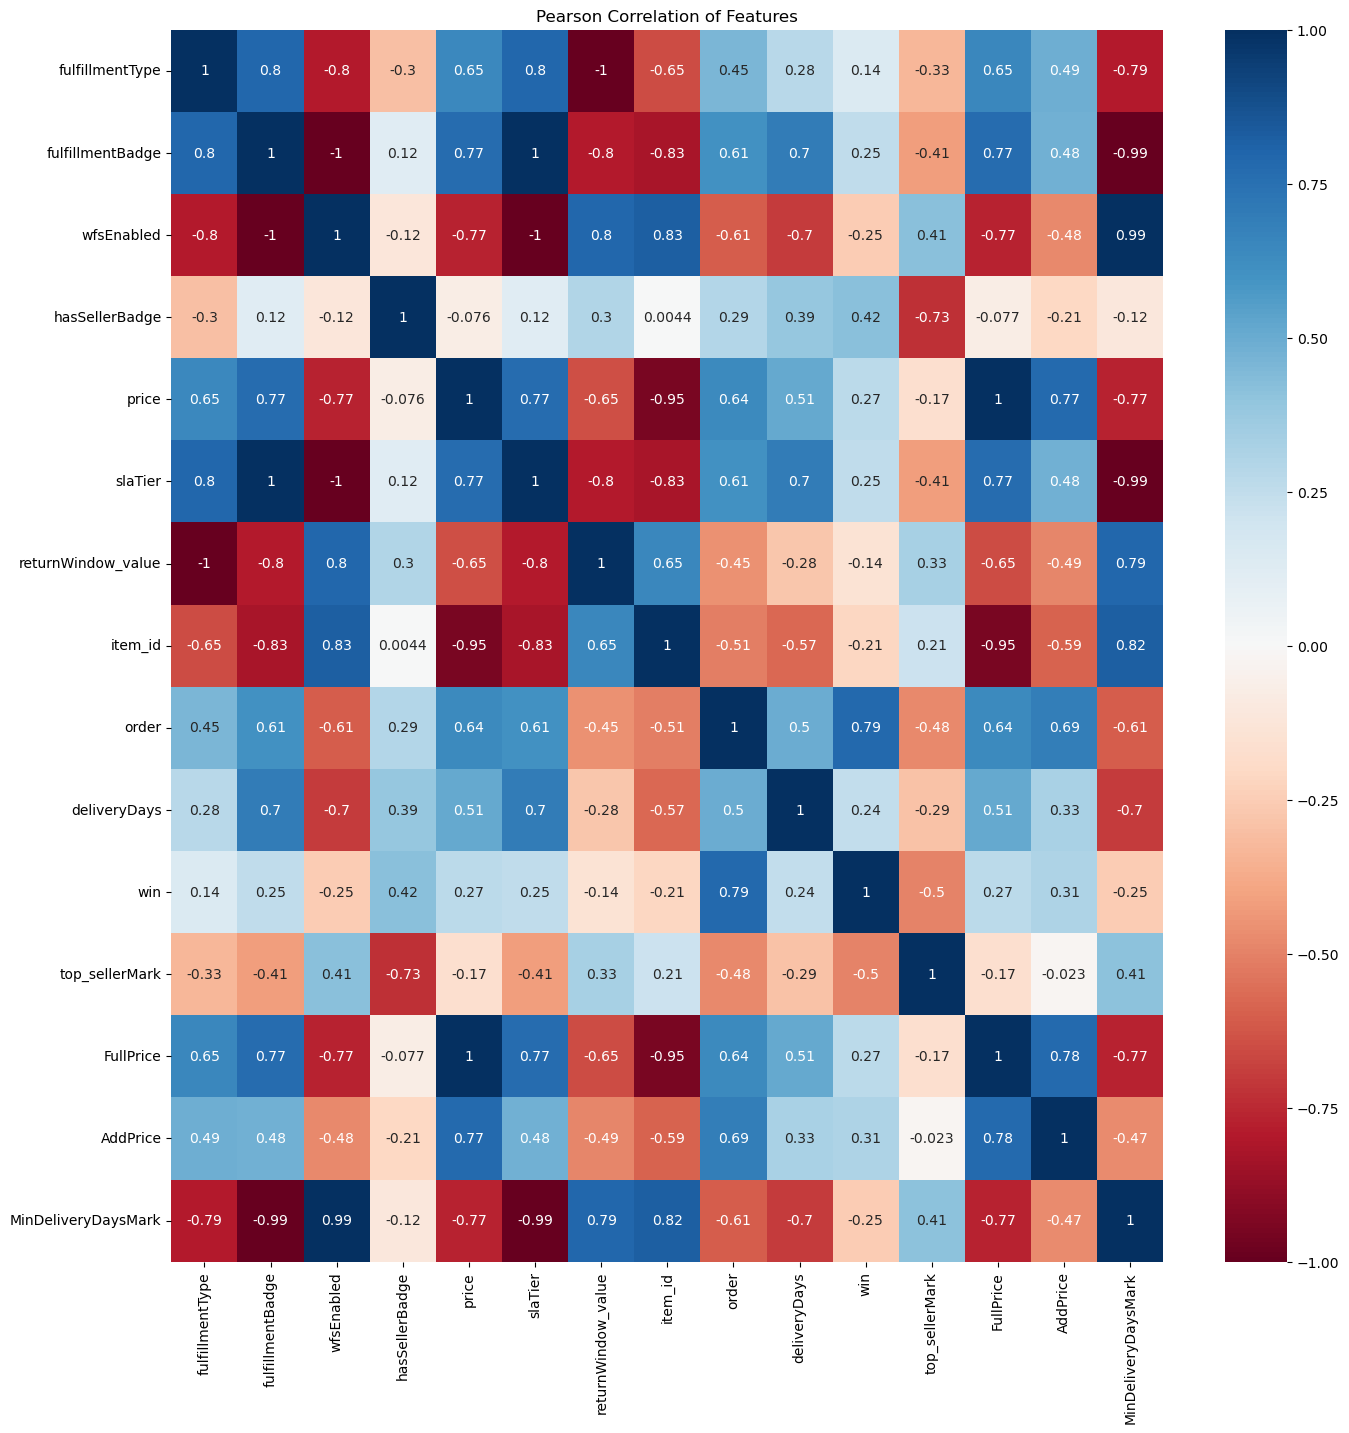

In [2346]:
# посмотрим на линейные зависимости с целевыми переменными order и win 
colormap = plt.cm.RdBu
plt.figure(figsize=(16,16))
plt.title('Pearson Correlation of Features')
sns.heatmap(offer_cl.corr(), cmap=colormap, linecolor='white', annot=True)

In [2416]:
#удаляем не нужные столбцы: price и FullPrice (AddPrice коррелирует лучше)
# wfsEnabled и fulfillmentBadge взамообратные, slaTier и MinDeliveryDayMark взаимозависимы
offer_model = offer_cl.drop(['price', 'period', 'item_id', 'FullPrice', 'wfsEnabled', 'slaTier', 'fulfillmentType'], axis=1) 

# Modeling

In [2551]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ndcg_score

In [2424]:
# Функция для визуализации feature_importance в моделях
def feature_importance_chart(model, df):
    feature_importance = pd.DataFrame(df.columns, columns = ['feature'])
    feature_importance['importance'] = model.feature_importances_
    feature_importance = feature_importance.sort_values('importance')
    
    ax = feature_importance.plot.barh(x='feature', y='importance')
    plt.show()

In [2426]:
# Маштабирование deliveryDays признака
scaler = StandardScaler()

offer_rank = offer_cl.drop(['price', 'item_id', 'FullPrice', 'wfsEnabled','slaTier', 'fulfillmentType'
                           ], axis=1) # wfsEnabled и fulfillmentBadge взамообратные, slaTier и MinDeliveryDayMark зависимы

offer_rank["deliveryDays"] = scaler.fit_transform(offer_rank["deliveryDays"].values.reshape(-1,1))

# returnWindow_value заменим 30 на 0 и 90 на 1
offer_rank['returnWindow_value'] = offer_rank.returnWindow_value.astype(str)
offer_rank.returnWindow_value.replace({"30":0, "90":1}, inplace=True)

# Построим модели ранжирования и настроим их

In [2427]:
#сохраним названия продацов
sellerDisplayName = offer_rank.sellerDisplayName

# пронумеруем витрины
offer_rank['id'] = (offer_rank.period != offer_rank.period.shift()).cumsum()
offer_rank = offer_rank.drop(['period'], axis=1)

In [2428]:
offer_rank.head(5)

,fulfillmentBadge,sellerDisplayName,hasSellerBadge,returnWindow_value,order,deliveryDays,win,top_sellerMark,AddPrice,MinDeliveryDaysMark,id
2998,1,Maison Rouge,0,0,0,-0.028042,0,0,0.000,0,1
2999,0,Adina's Beauty Shop,0,1,1,-0.664789,1,1,0.242,1,1
3000,1,Walmart.com,2,1,2,-0.028042,1,0,0.122,0,1
3001,1,SS-BEAUTY,0,0,3,2.518948,1,0,0.485,0,1
3002,1,Maison Rouge,0,0,0,-0.028042,0,0,0.000,0,2


# Базовая модель по всем рангам на основе LGBMRanker

In [2429]:
import lightgbm as lightgbm

In [2430]:
from sklearn.model_selection import GroupShuffleSplit

# для разделения датасета на трейн и тест по группам
gss = GroupShuffleSplit(test_size=.30, n_splits=1, random_state = 7
                       ).split(offer_rank, groups=offer_rank['id'])

X_train_inds, X_test_inds = next(gss)

train_data= offer_rank.iloc[X_train_inds]
test_data= offer_rank.iloc[X_test_inds]

# весь набор данных
sellerDisplayName = offer_rank.sellerDisplayName
x_full = offer_rank.drop(["id", "win", 'order','sellerDisplayName'], axis=1)
y_full = offer_rank["win"]
y_full_order = offer_rank["order"]

# трейн размеры групп
qids_train = train_data.groupby("id")["id"].count().to_numpy()
sellerDisplayName_train = train_data.sellerDisplayName
X_train = train_data.drop(["id", "win",'order', 'sellerDisplayName'], axis=1)
y_train = train_data["win"]
y_train_order = train_data["order"] # для нескольких рангов

# тест размеры групп
qids_validation = test_data.groupby("id")["id"].count().to_numpy()
sellerDisplayName_test = test_data.sellerDisplayName
X_validation = test_data.drop(["id", "win", 'order','sellerDisplayName'], axis=1)
y_validation = test_data["win"]
y_validation_order = test_data["order"] # для нескольких рангов

In [2431]:
# базовая модель без настроек, lambdarank - для задач ранжтирования, ndcg - целевая метрика
model_rank_order = lightgbm.LGBMRanker(
    objective="lambdarank",
    metric="ndcg")

In [2432]:
# обучение происходим по группам в нашем случае витринам
model_rank_order.fit(
    X=X_train,
    y=y_train_order,
    group=qids_train,
    eval_set=[(X_validation, y_validation_order)],
    eval_group=[qids_validation],
    verbose=50,
)

[50]	valid_0's ndcg@1: 0.949239	valid_0's ndcg@2: 0.980455	valid_0's ndcg@3: 0.978809	valid_0's ndcg@4: 0.980788	valid_0's ndcg@5: 0.980788
[100]	valid_0's ndcg@1: 0.949239	valid_0's ndcg@2: 0.980725	valid_0's ndcg@3: 0.978863	valid_0's ndcg@4: 0.980841	valid_0's ndcg@5: 0.980841


LGBMRanker(metric='ndcg', objective='lambdarank')

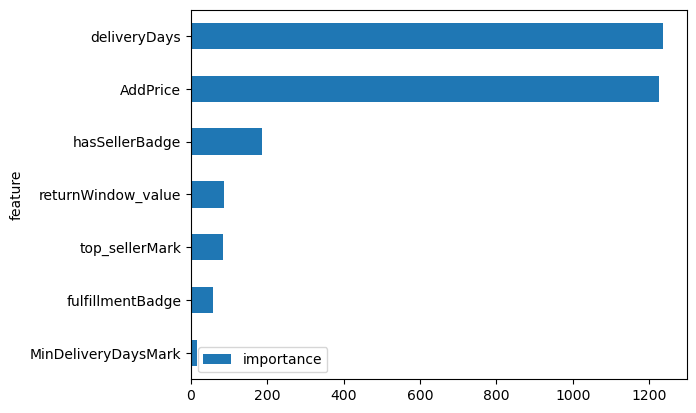

In [2433]:
feature_importance_chart(model_rank_order, X_validation)

In [2434]:
ndcg_score([y_validation_order], [model_rank_order.predict(X_validation)])

0.9731084637606553

In [ ]:
# Предсказания модели можно интерпретировать как вероятности того, что элемент будет релевантным (то есть будет на вершине), 
# поэтому для создания рейтинга нам нужно только упорядочить набор по этим числам.

In [2559]:
def prediction_rank_table(df, model, x_val, Seller_Name, order_win, n=5):
    prediction_order_rank = df[[order_win, 'id']].copy()
    prediction_order_rank['rank'] = model.predict(x_val)
    
    # пронумеруем ранги от минимального значения в rank
    prediction_order_rank['rank_number'] = (prediction_order_rank.groupby(['id']).rank() - 1)['rank']
    prediction_order_rank['sellerDisplayName'] = Seller_Name
    print(prediction_order_rank.head(n))
    
    #count_positive
    count_positive = prediction_order_rank[(prediction_order_rank[order_win] == 0) & 
                                       (prediction_order_rank.rank_number == 0)] ['rank_number']
    # доля правильных правильно предсказанных витрин по предсказанию bbwin==0
    accuracy = count_positive.count() / prediction_order_rank[prediction_order_rank[order_win] == 0][order_win].count()
    print('\nДоля выигранных витрин по предсказанию модели (bbwin=0):', round(accuracy, 4))
    
    # Рассчитаем средний Рейтинг продавцов по их rank, спрогнозированных моделью
    rank_seller = prediction_order_rank.groupby('sellerDisplayName')['rank'].mean().reset_index()
    rank_seller['rank_seller'] = rank_seller['rank'].rank()
    
    print('\nПрогнозируемый усредненный рейтинг продацов:')
    
    return rank_seller.sort_values('rank_seller')

In [2560]:
prediction_rank_table(test_data, model_rank_order, X_validation, sellerDisplayName_test, 'order')
# Отдельно будем отслеживать метрику для бизнеса, Доля выигранных витрин - количество релевантных прогнозов (из всех bbwin=0)

      order  id      rank  rank_number    sellerDisplayName
2998      0   1 -2.554543          0.0         Maison Rouge
2999      1   1 -1.636369          1.0  Adina's Beauty Shop
3000      2   1  1.012166          2.0          Walmart.com
3001      3   1  9.180707          3.0            SS-BEAUTY
3006      0   3 -2.554543          0.0         Maison Rouge

Доля выигранных витрин по предсказанию модели (bbwin=0): 0.9061

Прогнозируемый усредненный рейтинг продацов:


,sellerDisplayName,rank,rank_seller
3,Maison Rouge,-2.795553,1.0
1,Exotic Pro,-2.751688,2.0
0,Adina's Beauty Shop,-1.135780,3.0
6,thanks2you,0.911773,4.0
5,Walmart.com,1.248863,5.0
2,Fit & Fab,1.590421,6.0
4,SS-BEAUTY,7.945076,7.0


In [ ]:
# базовая модель дала хорошие показатели качества, попробуем настроить её

# Настройка с помощью optuna модели LGBMRanker

In [2000]:
import optuna as optuna

In [2437]:
# функция для настройки моделей LGBMRanker
def objective_lgb(trial, df_rank, y_col, N_splits=3, random_state=42):
    lgb_params = {
        "n_estimators": trial.suggest_categorical("n_estimators", [100, 200, 300]),
        "learning_rate": trial.suggest_float("learning_rate", 0.001, 0.3, log=True),
        "max_depth": trial.suggest_int("max_depth", 1, 10, step=1),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 10, 1000),
        "lambda_l1": trial.suggest_loguniform("lambda_l1", 1e-3, 100),
        "lambda_l2": trial.suggest_loguniform("lambda_l2", 1e-3, 100),  
        "objective": trial.suggest_categorical("objective", ['lambdarank']),
        "metric": trial.suggest_categorical("metric", ['ndcg']),
        "random_state": trial.suggest_categorical("random_state", [random_state]),        
    }
    
    n_predicts = np.empty(N_splits)
    
    # для разделения датасета на трейн и тест по группам
    gss = GroupShuffleSplit(n_splits=N_splits, test_size=.3, random_state=random_state)
    
    for idx, (train_index, test_index) in enumerate(gss.split(df_rank, groups=df_rank['id'])):
        
        train_data= df_rank.iloc[train_index]
        test_data= df_rank.iloc[test_index]
        
        # трейн размеры групп
        qids_train = train_data.groupby("id")["id"].count().to_numpy()
        X_train = train_data.drop(["id", "win",'order', 'sellerDisplayName'], axis=1)
        y_train = train_data[y_col]

        # тест размеры групп
        qids_validation = test_data.groupby("id")["id"].count().to_numpy()
        X_validation = test_data.drop(["id", "win", 'order','sellerDisplayName'], axis=1)
        y_validation = test_data[y_col]
        
        model = lightgbm.LGBMRanker(**lgb_params)
        model.fit(X_train,
                  y_train,
                  group=qids_train,
                  eval_set=[(X_validation, y_validation)],
                  eval_group=[qids_validation],
                  eval_metric="ndcg",
                  early_stopping_rounds=100,
                  verbose=0)
                
        preds = model.predict(X_validation)
        n_predicts[idx] = ndcg_score([y_validation], [preds])

    return np.mean(n_predicts)

# Модель 1 настройка на все ранги

In [2438]:
study1 = optuna.create_study(direction="maximize", study_name="LGBR1")


def func(trial):
    return objective_lgb(trial,
                         offer_rank,
                         y_col="order"
                        )

optuna.logging.set_verbosity(optuna.logging.WARNING)
study1.optimize(func, n_trials=30, show_progress_bar=True)

  0%|          | 0/30 [00:00<?, ?it/s]

[LightGBM] [Warning] min_data_in_leaf is set=935, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=935
[LightGBM] [Warning] lambda_l1 is set=0.6593619900087233, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6593619900087233
[LightGBM] [Warning] lambda_l2 is set=3.7891391797777008, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.7891391797777008
[LightGBM] [Warning] min_data_in_leaf is set=935, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=935
[LightGBM] [Warning] lambda_l1 is set=0.6593619900087233, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6593619900087233
[LightGBM] [Warning] lambda_l2 is set=3.7891391797777008, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.7891391797777008
[LightGBM] [Warning] min_data_in_leaf is set=935, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=935
[LightGBM] [Warning] lambda_l1 is set=0.6593619900087233, reg_alpha=0.0 will be ignored. Curre

[LightGBM] [Warning] min_data_in_leaf is set=879, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=879
[LightGBM] [Warning] lambda_l1 is set=1.277450950514973, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.277450950514973
[LightGBM] [Warning] lambda_l2 is set=0.042110037320397614, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.042110037320397614
[LightGBM] [Warning] min_data_in_leaf is set=108, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=108
[LightGBM] [Warning] lambda_l1 is set=0.27381252951579216, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.27381252951579216
[LightGBM] [Warning] lambda_l2 is set=0.004638240455532023, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.004638240455532023
[LightGBM] [Warning] min_data_in_leaf is set=108, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=108
[LightGBM] [Warning] lambda_l1 is set=0.27381252951579216, reg_alpha=0.0 will be ignor

[LightGBM] [Warning] min_data_in_leaf is set=269, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=269
[LightGBM] [Warning] lambda_l1 is set=0.01825806628290198, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01825806628290198
[LightGBM] [Warning] lambda_l2 is set=0.08194877959271078, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.08194877959271078
[LightGBM] [Warning] min_data_in_leaf is set=269, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=269
[LightGBM] [Warning] lambda_l1 is set=0.01825806628290198, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01825806628290198
[LightGBM] [Warning] lambda_l2 is set=0.08194877959271078, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.08194877959271078
[LightGBM] [Warning] min_data_in_leaf is set=485, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=485
[LightGBM] [Warning] lambda_l1 is set=0.07151682723504262, reg_alpha=0.0 will be ignor

[LightGBM] [Warning] min_data_in_leaf is set=277, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=277
[LightGBM] [Warning] lambda_l1 is set=0.006408111135025746, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.006408111135025746
[LightGBM] [Warning] lambda_l2 is set=0.004677695921007822, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.004677695921007822
[LightGBM] [Warning] min_data_in_leaf is set=277, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=277
[LightGBM] [Warning] lambda_l1 is set=0.006408111135025746, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.006408111135025746
[LightGBM] [Warning] lambda_l2 is set=0.004677695921007822, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.004677695921007822
[LightGBM] [Warning] min_data_in_leaf is set=277, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=277
[LightGBM] [Warning] lambda_l1 is set=0.006408111135025746, reg_alpha=0.0 will

In [2439]:
study1.best_params

{'n_estimators': 100,
 'learning_rate': 0.16769407726089694,
 'max_depth': 1,
 'min_data_in_leaf': 279,
 'lambda_l1': 0.007487689181707262,
 'lambda_l2': 0.02104554494254849,
 'objective': 'lambdarank',
 'metric': 'ndcg',
 'random_state': 42}

In [2440]:
best_params_ver1 = study1.best_params
lgbmr_optuna1 = lightgbm.LGBMRanker(**best_params_ver1)
lgbmr_optuna1.fit(X_train,
                  y_train_order,
                  group=qids_train,
                  eval_set=[(X_validation, y_validation_order)],
                  eval_group=[qids_validation],
                  eval_metric="ndcg",
                  early_stopping_rounds=100,
                  verbose=10,)

[LightGBM] [Warning] min_data_in_leaf is set=279, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=279
[LightGBM] [Warning] lambda_l1 is set=0.007487689181707262, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.007487689181707262
[LightGBM] [Warning] lambda_l2 is set=0.02104554494254849, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.02104554494254849
[10]	valid_0's ndcg@1: 0.948211	valid_0's ndcg@2: 0.979523	valid_0's ndcg@3: 0.977392	valid_0's ndcg@4: 0.980277	valid_0's ndcg@5: 0.9803
[20]	valid_0's ndcg@1: 0.948211	valid_0's ndcg@2: 0.979853	valid_0's ndcg@3: 0.977456	valid_0's ndcg@4: 0.98034	valid_0's ndcg@5: 0.980363
[30]	valid_0's ndcg@1: 0.948211	valid_0's ndcg@2: 0.980393	valid_0's ndcg@3: 0.977562	valid_0's ndcg@4: 0.980446	valid_0's ndcg@5: 0.980469
[40]	valid_0's ndcg@1: 0.948211	valid_0's ndcg@2: 0.980393	valid_0's ndcg@3: 0.977562	valid_0's ndcg@4: 0.980446	valid_0's ndcg@5: 0.980469
[50]	valid_0's ndcg@1: 0.948211	valid_0's ndcg

LGBMRanker(lambda_l1=0.007487689181707262, lambda_l2=0.02104554494254849,
           learning_rate=0.16769407726089694, max_depth=1, metric='ndcg',
           min_data_in_leaf=279, objective='lambdarank', random_state=42)

In [2441]:
# метрика выросла
ndcg_score([y_validation_order], [lgbmr_optuna1.predict(X_validation)])

0.9903674955552922

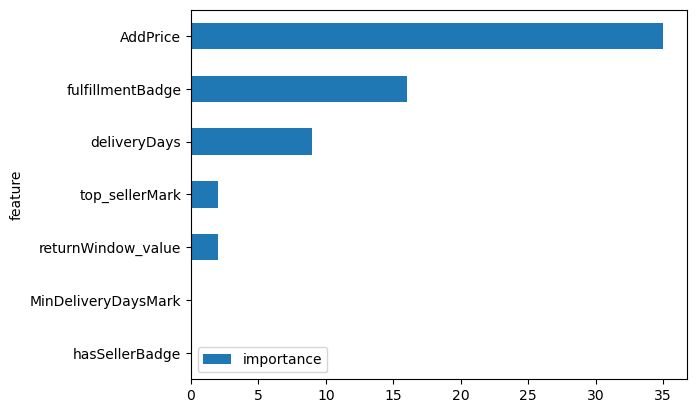

In [2442]:
feature_importance_chart(lgbmr_optuna1, X_validation)

In [2567]:
prediction_rank_table(test_data, lgbmr_optuna1, X_validation, sellerDisplayName_test, 'order', 10)
# но доля выигранных витрин снизилась

      order  id      rank  rank_number    sellerDisplayName
2998      0   1 -0.530224          0.0         Maison Rouge
2999      1   1  0.062572          1.0  Adina's Beauty Shop
3000      2   1  1.473222          2.0          Walmart.com
3001      3   1  5.958217          3.0            SS-BEAUTY
3006      0   3 -0.530224          0.0         Maison Rouge
3007      1   3  0.062572          1.0  Adina's Beauty Shop
3008      2   3  1.473222          2.0          Walmart.com
3009      3   3  5.958217          3.0            SS-BEAUTY
3014      0   5 -0.530224          0.0         Maison Rouge
3015      1   5  0.062572          1.0  Adina's Beauty Shop

Доля выигранных витрин по предсказанию модели (bbwin=0): 0.8858

Прогнозируемый усредненный рейтинг продацов:


,sellerDisplayName,rank,rank_seller
0,Adina's Beauty Shop,-1.740875,1.0
1,Exotic Pro,-0.530224,2.0
3,Maison Rouge,-0.396670,3.0
6,thanks2you,-0.296993,4.0
2,Fit & Fab,0.345407,5.0
5,Walmart.com,2.149692,6.0
4,SS-BEAUTY,5.264673,7.0


In [ ]:
# Доля выигранных витрин снизилась, а продавец Adina's Beauty Shop полнялся в ТОП рекомендации.
# Модель лучшая по качеству прогнозирования ранга на всех позициях в витрине.

# Модель 2 настройка на 2 ранга (0 выиграл и 1 проиграл)

In [2450]:
study2 = optuna.create_study(direction="maximize", study_name="LGBR2")


def func(trial):
    return objective_lgb(trial,
                         offer_rank,
                         y_col="win"
                        )

optuna.logging.set_verbosity(optuna.logging.WARNING)
study2.optimize(func, n_trials=30, show_progress_bar=True)

  0%|          | 0/30 [00:00<?, ?it/s]

[LightGBM] [Warning] min_data_in_leaf is set=185, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=185
[LightGBM] [Warning] lambda_l1 is set=1.2440351406926076, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2440351406926076
[LightGBM] [Warning] lambda_l2 is set=30.354971464095616, reg_lambda=0.0 will be ignored. Current value: lambda_l2=30.354971464095616
[LightGBM] [Warning] min_data_in_leaf is set=185, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=185
[LightGBM] [Warning] lambda_l1 is set=1.2440351406926076, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2440351406926076
[LightGBM] [Warning] lambda_l2 is set=30.354971464095616, reg_lambda=0.0 will be ignored. Current value: lambda_l2=30.354971464095616
[LightGBM] [Warning] min_data_in_leaf is set=185, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=185
[LightGBM] [Warning] lambda_l1 is set=1.2440351406926076, reg_alpha=0.0 will be ignored. Curre

[LightGBM] [Warning] min_data_in_leaf is set=215, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=215
[LightGBM] [Warning] lambda_l1 is set=0.007036199118999689, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.007036199118999689
[LightGBM] [Warning] lambda_l2 is set=0.08555348427980108, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.08555348427980108
[LightGBM] [Warning] min_data_in_leaf is set=215, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=215
[LightGBM] [Warning] lambda_l1 is set=0.007036199118999689, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.007036199118999689
[LightGBM] [Warning] lambda_l2 is set=0.08555348427980108, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.08555348427980108
[LightGBM] [Warning] min_data_in_leaf is set=215, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=215
[LightGBM] [Warning] lambda_l1 is set=0.007036199118999689, reg_alpha=0.0 will be 

[LightGBM] [Warning] min_data_in_leaf is set=696, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=696
[LightGBM] [Warning] lambda_l1 is set=0.05844916600341757, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.05844916600341757
[LightGBM] [Warning] lambda_l2 is set=0.020584590738309542, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.020584590738309542
[LightGBM] [Warning] min_data_in_leaf is set=696, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=696
[LightGBM] [Warning] lambda_l1 is set=0.05844916600341757, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.05844916600341757
[LightGBM] [Warning] lambda_l2 is set=0.020584590738309542, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.020584590738309542
[LightGBM] [Warning] min_data_in_leaf is set=696, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=696
[LightGBM] [Warning] lambda_l1 is set=0.05844916600341757, reg_alpha=0.0 will be i

[LightGBM] [Warning] min_data_in_leaf is set=369, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=369
[LightGBM] [Warning] lambda_l1 is set=0.0012450668790753797, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0012450668790753797
[LightGBM] [Warning] lambda_l2 is set=0.10217722635814043, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.10217722635814043
[LightGBM] [Warning] min_data_in_leaf is set=369, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=369
[LightGBM] [Warning] lambda_l1 is set=0.0012450668790753797, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0012450668790753797
[LightGBM] [Warning] lambda_l2 is set=0.10217722635814043, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.10217722635814043
[LightGBM] [Warning] min_data_in_leaf is set=369, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=369
[LightGBM] [Warning] lambda_l1 is set=0.0012450668790753797, reg_alpha=0.0 wil

[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Warning] lambda_l1 is set=0.003889811403583043, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.003889811403583043
[LightGBM] [Warning] lambda_l2 is set=4.6151080414651195, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.6151080414651195
[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Warning] lambda_l1 is set=0.003889811403583043, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.003889811403583043
[LightGBM] [Warning] lambda_l2 is set=4.6151080414651195, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.6151080414651195
[LightGBM] [Warning] min_data_in_leaf is set=107, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=107
[LightGBM] [Warning] lambda_l1 is set=0.20292043266554835, reg_alpha=0.0 will be ignored. 

In [2451]:
study2.best_params

{'n_estimators': 300,
 'learning_rate': 0.2835884808571657,
 'max_depth': 5,
 'min_data_in_leaf': 19,
 'lambda_l1': 0.009018392116851867,
 'lambda_l2': 1.3036422783755017,
 'objective': 'lambdarank',
 'metric': 'ndcg',
 'random_state': 42}

In [2452]:
best_params_ver2 = study2.best_params
lgbmr_optuna2 = lightgbm.LGBMRanker(**best_params_ver2)
lgbmr_optuna2.fit(X_train,
                  y_train,
                  group=qids_train,
                  eval_set=[(X_validation, y_validation)],
                  eval_group=[qids_validation],
                  eval_metric="ndcg",
                  early_stopping_rounds=100,
                  verbose=10,)

[LightGBM] [Warning] min_data_in_leaf is set=19, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=19
[LightGBM] [Warning] lambda_l1 is set=0.009018392116851867, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.009018392116851867
[LightGBM] [Warning] lambda_l2 is set=1.3036422783755017, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.3036422783755017
[10]	valid_0's ndcg@1: 0.950508	valid_0's ndcg@2: 0.981734	valid_0's ndcg@3: 0.972503	valid_0's ndcg@4: 0.980241	valid_0's ndcg@5: 0.980432
[20]	valid_0's ndcg@1: 0.950508	valid_0's ndcg@2: 0.981734	valid_0's ndcg@3: 0.972503	valid_0's ndcg@4: 0.980241	valid_0's ndcg@5: 0.980432
[30]	valid_0's ndcg@1: 0.950508	valid_0's ndcg@2: 0.981734	valid_0's ndcg@3: 0.972503	valid_0's ndcg@4: 0.980241	valid_0's ndcg@5: 0.980432
[40]	valid_0's ndcg@1: 0.950508	valid_0's ndcg@2: 0.981734	valid_0's ndcg@3: 0.972503	valid_0's ndcg@4: 0.980241	valid_0's ndcg@5: 0.980432
[50]	valid_0's ndcg@1: 0.950508	valid_0's ndcg@

LGBMRanker(lambda_l1=0.009018392116851867, lambda_l2=1.3036422783755017,
           learning_rate=0.2835884808571657, max_depth=5, metric='ndcg',
           min_data_in_leaf=19, n_estimators=300, objective='lambdarank',
           random_state=42)

In [2565]:
# метрика качества по столбцу win выросла
ndcg_score([y_validation], [lgbmr_optuna2.predict(X_validation)])

0.995951015727695

In [2566]:
# метрика качества по столбцу order снизилась
ndcg_score([y_validation_order], [lgbmr_optuna2.predict(X_validation)])

0.9528723442849097

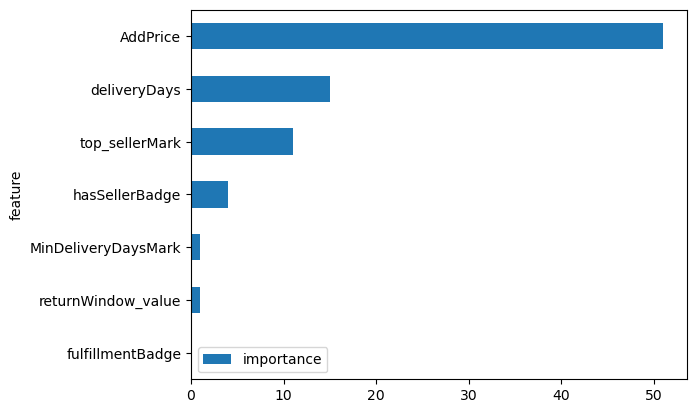

In [2454]:
feature_importance_chart(lgbmr_optuna2, X_validation)

In [2562]:
prediction_rank_table(test_data, lgbmr_optuna2, X_validation, sellerDisplayName_test, 'order', 10)
# выросла Доля выигранных витрин по предсказанию модели

      order  id      rank  rank_number    sellerDisplayName
2998      0   1 -0.570986          0.0         Maison Rouge
2999      1   1  0.217788          1.0  Adina's Beauty Shop
3000      2   1  2.126701          2.0          Walmart.com
3001      3   1  2.245998          3.0            SS-BEAUTY
3006      0   3 -0.570986          0.0         Maison Rouge
3007      1   3  0.217788          1.0  Adina's Beauty Shop
3008      2   3  2.126701          2.0          Walmart.com
3009      3   3  2.245998          3.0            SS-BEAUTY
3014      0   5 -0.570986          0.0         Maison Rouge
3015      1   5  0.217788          1.0  Adina's Beauty Shop

Доля выигранных витрин по предсказанию модели (bbwin=0): 0.9137

Прогнозируемый усредненный рейтинг продацов:


,sellerDisplayName,rank,rank_seller
0,Adina's Beauty Shop,-0.879739,1.0
3,Maison Rouge,-0.636326,2.0
1,Exotic Pro,-0.252798,3.0
2,Fit & Fab,0.189371,4.0
6,thanks2you,0.937797,5.0
4,SS-BEAUTY,2.155806,6.0
5,Walmart.com,2.220892,7.0


Text(0.5, 1.0, 'Count of sellerDisplayName by win')

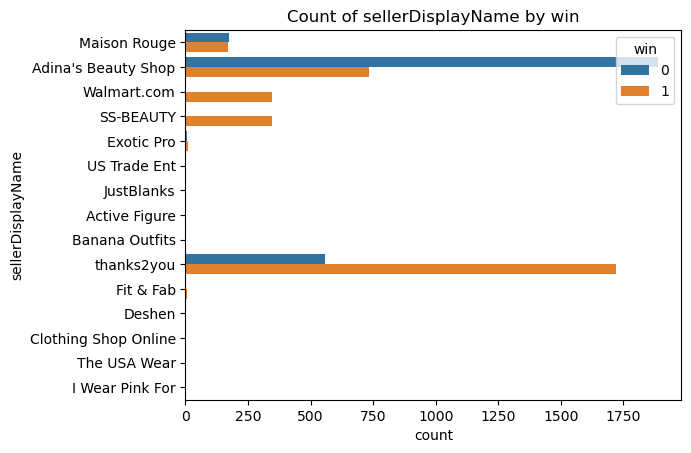

In [2552]:
# И если посмотреть выигрыши на графике в разрезе продавцов, Adina's Beauty Shop я бы также отметил на первом месте, а
# Maison Rouge на втором. Такая модель лучше учиться под 1-й ранг.
sns.countplot(data=offer_cl, y="sellerDisplayName", hue="win")
plt.title("Count of sellerDisplayName by win", size=12)

# Базовая модель без настройки по всем рангам на XGBRanker

In [2312]:
import xgboost as xgb
from sklearn.metrics import ndcg_score

model_xgb = xgb.XGBRanker(  
    booster='gbtree',
    objective='rank:ndcg',
    eval_metric='ndcg'
    )

In [2456]:
model_xgb.fit(
    X=X_train,
    y=y_train_order,
    group=qids_train,
    eval_set=[(X_validation, y_validation_order)],
    eval_group=[qids_validation],
    verbose=10,
)

[0]	validation_0-ndcg:0.97713
[10]	validation_0-ndcg:0.97932
[20]	validation_0-ndcg:0.98031
[30]	validation_0-ndcg:0.98013
[40]	validation_0-ndcg:0.98013
[50]	validation_0-ndcg:0.98013
[60]	validation_0-ndcg:0.98013
[70]	validation_0-ndcg:0.98013
[80]	validation_0-ndcg:0.98018
[90]	validation_0-ndcg:0.98018
[99]	validation_0-ndcg:0.98018


XGBRanker(base_score=None, booster='gbtree', callbacks=None,
          colsample_bylevel=None, colsample_bynode=None, colsample_bytree=None,
          early_stopping_rounds=None, enable_categorical=False,
          eval_metric='ndcg', feature_types=None, gamma=None, gpu_id=None,
          grow_policy=None, importance_type=None, interaction_constraints=None,
          learning_rate=None, max_bin=None, max_cat_threshold=None,
          max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
          max_leaves=None, min_child_weight=None, missing=nan,
          monotone_constraints=None, n_estimators=100, n_jobs=None,
          num_parallel_tree=None, objective='rank:ndcg', predictor=None, ...)

In [2457]:
ndcg_score([y_validation_order], [model_xgb.predict(X_validation)])

0.9686264119352198

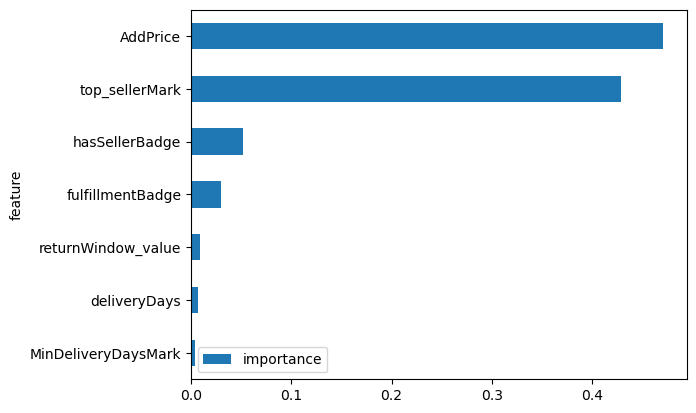

In [2458]:
feature_importance_chart(model_xgb, X_validation)

In [2459]:
prediction_rank_table(test_data, model_xgb, X_validation, sellerDisplayName_test, 'order')

      order  id      rank  rank_number    sellerDisplayName
2998      0   1 -3.133526          0.0         Maison Rouge
2999      1   1 -2.251055          1.0  Adina's Beauty Shop
3000      2   1  0.913055          2.0          Walmart.com
3001      3   1  7.004203          3.0            SS-BEAUTY
3006      0   3 -3.133526          0.0         Maison Rouge

Доля выигранных витрин по предсказанию модели (bbwin=0): 0.8782

Прогнозируемый усредненный рейтинг продацов:


,sellerDisplayName,rank,rank_seller
3,Maison Rouge,-3.065688,1.0
1,Exotic Pro,-2.066565,2.0
0,Adina's Beauty Shop,-0.619139,3.0
5,Walmart.com,1.029929,4.0
6,thanks2you,1.438031,5.0
2,Fit & Fab,3.120667,6.0
4,SS-BEAUTY,5.912665,7.0


In [ ]:
# Настройка модели XGBRanker

In [2460]:
# функция для настройки моделей XGBRanker
def objective_xgb(trial, df_rank, y_col, N_splits=3, random_state=42):
    lgb_params = {
        "n_estimators": trial.suggest_categorical("n_estimators", [100, 200, 300]),
        "learning_rate": trial.suggest_float("learning_rate", 0.001, 0.3, log=True),
        "max_depth": trial.suggest_int("max_depth", 1, 10, step=1),
        "max_leaves": trial.suggest_int("max_leaves", 1, 10, step=1),
        "reg_alpha": trial.suggest_loguniform("reg_alpha", 1e-3, 100),
        "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 100),  
        "booster": trial.suggest_categorical("booster", ['gbtree']),
        "objective": trial.suggest_categorical("objective", ['rank:ndcg']),
        "random_state": trial.suggest_categorical("random_state", [random_state]),        
    }
    
    n_predicts = np.empty(N_splits)
    
    # для разделения датасета на трейн и тест по группам
    gss = GroupShuffleSplit(n_splits=N_splits, test_size=.3, random_state=random_state)
    
    for idx, (train_index, test_index) in enumerate(gss.split(df_rank, groups=df_rank['id'])):
        
        train_data= df_rank.iloc[train_index]
        test_data= df_rank.iloc[test_index]
        
        # трейн размеры групп
        qids_train = train_data.groupby("id")["id"].count().to_numpy()
        X_train = train_data.drop(["id", "win",'order', 'sellerDisplayName'], axis=1)
        y_train = train_data[y_col]

        # тест размеры групп
        qids_validation = test_data.groupby("id")["id"].count().to_numpy()
        X_validation = test_data.drop(["id", "win", 'order','sellerDisplayName'], axis=1)
        y_validation = test_data[y_col]
        
        model = xgb.XGBRanker(**lgb_params)
        model.fit(X_train,
                  y_train,
                  group=qids_train,
                  eval_set=[(X_validation, y_validation)],
                  eval_group=[qids_validation],
                  eval_metric="ndcg",
                  early_stopping_rounds=100,
                  verbose=0)
                
        preds = model.predict(X_validation)
        n_predicts[idx] = ndcg_score([y_validation], [preds])

    return np.mean(n_predicts)

# Модель 3 по всем рангам XGBRanker настройка

In [2461]:
study3 = optuna.create_study(direction="maximize", study_name="XGBR3")


def func(trial):
    return objective_xgb(trial,
                         offer_rank,
                         y_col="order"
                        )

optuna.logging.set_verbosity(optuna.logging.WARNING)
study3.optimize(func, n_trials=30, show_progress_bar=True)

  0%|          | 0/30 [00:00<?, ?it/s]

In [2462]:
study3.best_params

{'n_estimators': 300,
 'learning_rate': 0.06594662725422155,
 'max_depth': 3,
 'max_leaves': 7,
 'reg_alpha': 0.025540598843890358,
 'reg_lambda': 0.10686508980563751,
 'booster': 'gbtree',
 'objective': 'rank:ndcg',
 'random_state': 42}

In [2463]:
best_params_ver3 = study3.best_params
xgb_optuna3 = xgb.XGBRanker(**best_params_ver3)
xgb_optuna3.fit(X_train,
                 y_train,
                 group=qids_train,
                 eval_set=[(X_validation, y_validation)],
                 eval_group=[qids_validation],
                 eval_metric="ndcg",
                 early_stopping_rounds=100,
                 verbose=10,)

[0]	validation_0-ndcg:0.97942
[10]	validation_0-ndcg:0.97955
[20]	validation_0-ndcg:0.97955
[30]	validation_0-ndcg:0.97955
[40]	validation_0-ndcg:0.97955
[50]	validation_0-ndcg:0.97955
[60]	validation_0-ndcg:0.97955
[70]	validation_0-ndcg:0.97965
[80]	validation_0-ndcg:0.97965
[90]	validation_0-ndcg:0.97965
[100]	validation_0-ndcg:0.97965
[110]	validation_0-ndcg:0.97965
[120]	validation_0-ndcg:0.97965
[130]	validation_0-ndcg:0.97965
[140]	validation_0-ndcg:0.97969
[150]	validation_0-ndcg:0.97998
[160]	validation_0-ndcg:0.98031
[170]	validation_0-ndcg:0.98086
[180]	validation_0-ndcg:0.98078
[190]	validation_0-ndcg:0.98078
[200]	validation_0-ndcg:0.98078
[210]	validation_0-ndcg:0.98078
[220]	validation_0-ndcg:0.98078
[230]	validation_0-ndcg:0.98082
[240]	validation_0-ndcg:0.98090
[250]	validation_0-ndcg:0.98090
[260]	validation_0-ndcg:0.98090
[270]	validation_0-ndcg:0.98090
[280]	validation_0-ndcg:0.98090
[290]	validation_0-ndcg:0.98090
[299]	validation_0-ndcg:0.98090


XGBRanker(base_score=None, booster='gbtree', callbacks=None,
          colsample_bylevel=None, colsample_bynode=None, colsample_bytree=None,
          early_stopping_rounds=None, enable_categorical=False,
          eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
          grow_policy=None, importance_type=None, interaction_constraints=None,
          learning_rate=0.06594662725422155, max_bin=None,
          max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=None,
          max_depth=3, max_leaves=7, min_child_weight=None, missing=nan,
          monotone_constraints=None, n_estimators=300, n_jobs=None,
          num_parallel_tree=None, objective='rank:ndcg', predictor=None, ...)

In [2464]:
ndcg_score([y_validation_order], [xgb_optuna3.predict(X_validation)])

0.9671026939516761

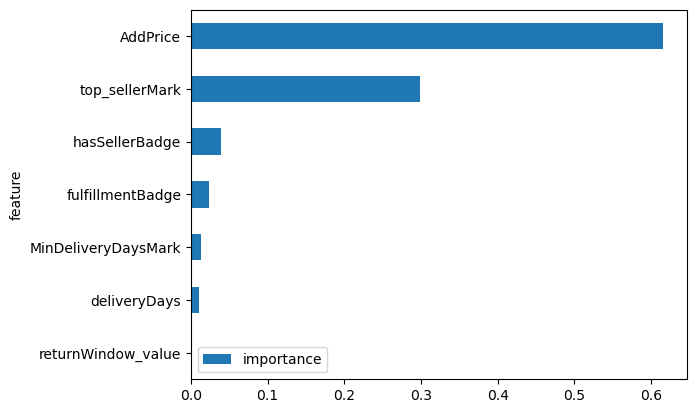

In [2465]:
feature_importance_chart(xgb_optuna3, X_validation)

In [2466]:
prediction_rank_table(test_data, xgb_optuna3, X_validation, sellerDisplayName_test, 'order')

      order  id      rank  rank_number    sellerDisplayName
2998      0   1  0.147574          0.0         Maison Rouge
2999      1   1  2.047724          1.0  Adina's Beauty Shop
3000      2   1  4.045143          2.0          Walmart.com
3001      3   1  6.681121          3.0            SS-BEAUTY
3006      0   3  0.147574          0.0         Maison Rouge

Доля выигранных витрин по предсказанию модели (bbwin=0): 0.9112

Прогнозируемый усредненный рейтинг продацов:


,sellerDisplayName,rank,rank_seller
0,Adina's Beauty Shop,-0.405918,1.0
3,Maison Rouge,-0.075582,2.0
1,Exotic Pro,0.961885,3.0
6,thanks2you,1.429865,4.0
2,Fit & Fab,4.062213,5.0
4,SS-BEAUTY,5.706632,6.0
5,Walmart.com,6.198214,7.0


In [ ]:
# Тоже хорошая модель, немного уступает модели 2 по доле выигранных витрин - и в целом она работает медленее

# Модель 4 XGBRanker по 2 рангам настройка

In [2553]:
study4 = optuna.create_study(direction="maximize", study_name="XGB4")


def func(trial):
    return objective_xgb(trial,
                         offer_rank,
                         y_col="win"
                        )

optuna.logging.set_verbosity(optuna.logging.WARNING)
study4.optimize(func, n_trials=30, show_progress_bar=True)

  0%|          | 0/30 [00:00<?, ?it/s]

In [2554]:
study4.best_params

{'n_estimators': 100,
 'learning_rate': 0.1237200439982312,
 'max_depth': 2,
 'max_leaves': 9,
 'reg_alpha': 0.0015842178476871117,
 'reg_lambda': 0.01821679234861521,
 'booster': 'gbtree',
 'objective': 'rank:ndcg',
 'random_state': 42}

In [2555]:
best_params_ver4 = study4.best_params
xgb_optuna4 = xgb.XGBRanker(**best_params_ver4)
xgb_optuna4.fit(X_train,
                y_train,
                group=qids_train,
                eval_set=[(X_validation, y_validation)],
                eval_group=[qids_validation],
                eval_metric="ndcg",
                early_stopping_rounds=100,
                verbose=10,)

[0]	validation_0-ndcg:0.97955
[10]	validation_0-ndcg:0.97955
[20]	validation_0-ndcg:0.97955
[30]	validation_0-ndcg:0.97955
[40]	validation_0-ndcg:0.97955
[50]	validation_0-ndcg:0.97955
[60]	validation_0-ndcg:0.97965
[70]	validation_0-ndcg:0.97965
[80]	validation_0-ndcg:0.97965
[90]	validation_0-ndcg:0.97965
[99]	validation_0-ndcg:0.97965


XGBRanker(base_score=None, booster='gbtree', callbacks=None,
          colsample_bylevel=None, colsample_bynode=None, colsample_bytree=None,
          early_stopping_rounds=None, enable_categorical=False,
          eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
          grow_policy=None, importance_type=None, interaction_constraints=None,
          learning_rate=0.1237200439982312, max_bin=None,
          max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=None,
          max_depth=2, max_leaves=9, min_child_weight=None, missing=nan,
          monotone_constraints=None, n_estimators=100, n_jobs=None,
          num_parallel_tree=None, objective='rank:ndcg', predictor=None, ...)

In [2556]:
ndcg_score([y_validation], [xgb_optuna4.predict(X_validation)])

0.9958852351702732

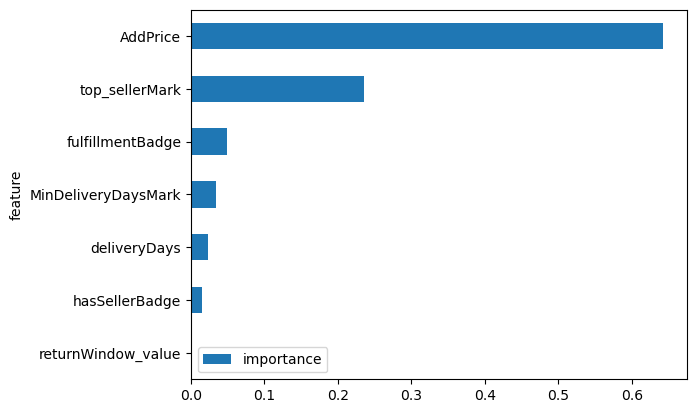

In [2557]:
feature_importance_chart(xgb_optuna4, X_validation)

In [2558]:
prediction_rank_table(test_data, xgb_optuna4, X_validation, sellerDisplayName_test, 'win')

      win  id      rank  rank_number    sellerDisplayName
2998    0   1 -0.555109          0.0         Maison Rouge
2999    1   1  0.410053          1.0  Adina's Beauty Shop
3000    1   1  3.321635          2.0          Walmart.com
3001    1   1  3.938806          3.0            SS-BEAUTY
3006    0   3 -0.555109          0.0         Maison Rouge

Доля выигранных витрин по предсказанию модели (bbwin=0): 0.8858

Прогнозируемый усредненный рейтинг продацов:


,sellerDisplayName,rank,rank_seller
0,Adina's Beauty Shop,-0.375836,1.0
3,Maison Rouge,-0.282840,2.0
1,Exotic Pro,0.211142,3.0
2,Fit & Fab,1.157141,4.0
6,thanks2you,1.323632,5.0
4,SS-BEAUTY,3.334800,6.0
5,Walmart.com,4.085577,7.0


In [ ]:
# Данная модель настроилась по метрике качества ndcg немного хуже модели №2. Но доля выигранных витрин по предсказанию
# модели здесь ниже.